<a href="https://colab.research.google.com/github/Nahid1970/Assignment-1-Datascience/blob/main/Human_Activity_Detection%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#locations setting for training and test datasets
train_data='/content/drive/MyDrive/Activity/Images/0'
test_data='/content/drive/MyDrive/Activity/Testing/0'

In [ ]:
from tqdm import tqdm
import os
from glob import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [ ]:
output=["Baseball","BasketBall" ,"Fighting","Football playing","Hospital","Eatting","Skating","walking","working"]
lebel=[]
output_lebel=[0,1,2,3,4,5,6,7,8]

In [ ]:
img_shape = (120, 120, 3)
train_dir="Images"
 
Name = "Model0"
df = []
lebel = []
rel_dirname = '/content/drive/MyDrive/Activity/Images'
    
for dirname in os.listdir(rel_dirname):
        print(dirname)
        for filename in glob(rel_dirname+'/'+dirname+'/*.png'):
             #print(filename)
             img = image.load_img((filename),target_size=img_shape)
             img = image.img_to_array(img)
             img = img/255.0
             df.append(img)
             lebel.append(dirname)
X = np.array(df)
lebel = np.array(lebel)
y = to_categorical(lebel)
print(X.shape)
print(y.shape)

0
1
2
3
4
5
6
7
8
(1697, 120, 120, 3)
(1697, 9)


In [ ]:
lebel

array(['0', '0', '0', ..., '8', '8', '8'], dtype='<U1')

In [ ]:
len(train_data)

40

In [ ]:
# splitting train set into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(y_train.shape)


(1357, 120, 120, 3)
(1357, 9)


In [ ]:
print(X_train.shape)

(1357, 120, 120, 3)


In [ ]:
#Building model 1 using customized convolutional and pooling layers

model = Sequential()

#input_shape is 100*100 since thats the dimension of each of the human images
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(120,120,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
# specifying parameters for fully connected layer
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(9,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 16)      208       
                                                                 
 activation (Activation)     (None, 120, 120, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        8

In [ ]:
#importing ootimizers
import keras.optimizers
from tensorflow.keras.optimizers import Adam

optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# creating a file to save the trained CNN model 
checkpointer = ModelCheckpoint(filepath = '/content/drive/MyDrive/Activity', verbose = 1, save_best_only = True)

# fitting model using above defined layers 
CNN_model = model.fit(X_train,y_train,
        batch_size = 128,
        epochs=10,
        validation_data=(X_test, y_test),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/10

Epoch 00001: val_loss improved from inf to 1.73240, saving model to /content/drive/MyDrive/Activity
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Activity/assets
11/11 - 17s - loss: 1.9724 - accuracy: 0.2609 - val_loss: 1.7324 - val_accuracy: 0.4324 - 17s/epoch - 2s/step
Epoch 2/10

Epoch 00002: val_loss improved from 1.73240 to 1.06314, saving model to /content/drive/MyDrive/Activity
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Activity/assets
11/11 - 2s - loss: 1.5011 - accuracy: 0.5284 - val_loss: 1.0631 - val_accuracy: 0.7294 - 2s/epoch - 184ms/step
Epoch 3/10

Epoch 00003: val_loss improved from 1.06314 to 0.48869, saving model to /content/drive/MyDrive/Activity
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Activity/assets
11/11 - 2s - loss: 0.8934 - accuracy: 0.7347 - val_loss: 0.4887 - val_accuracy: 0.8618 - 2s/epoch - 172ms/step
Epoch 4/10

Epoch 00004: val_loss improved from 0.48869 to 0.37024, saving model to /content/drive/MyD

In [ ]:
#checking testset accuracy

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

11/11 [==============================] - 0s 14ms/step - loss: 0.0743 - accuracy: 0.9735
Test accuracy: 0.9735293984413147


In [ ]:
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives

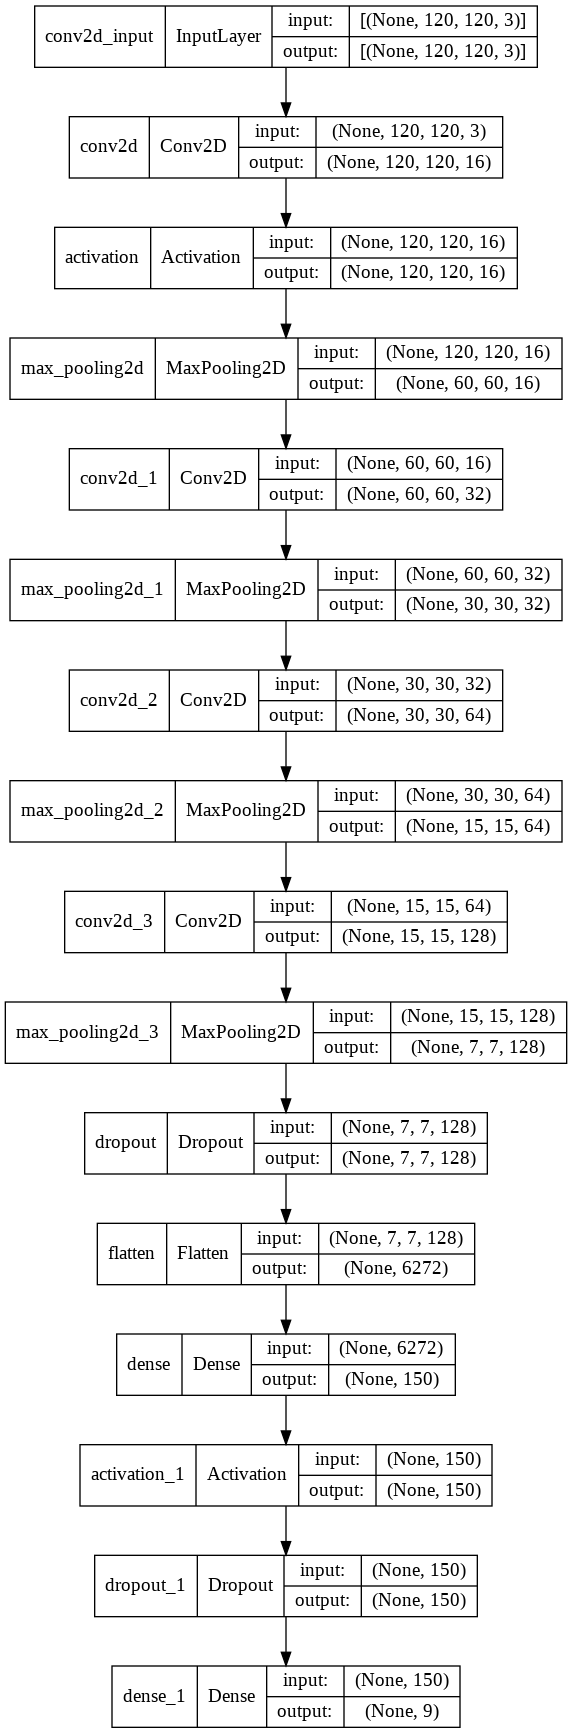

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file="myModel.png", show_shapes=True, show_layer_names=True)

In [ ]:
!pip install activation

  Created wheel for activation: filename=activation-0.1.0-py2.py3-none-any.whl size=4094 sha256=acd196739b35cc300fad410de586508f95a4426662271ac89e757e7a8b4a8000
  Stored in directory: /root/.cache/pip/wheels/74/87/d8/3521121eab8fc01df7dc1ad3ea7a7145c24f1649d578ed0783
Successfully built activation


In [ ]:
from tensorflow.python.keras import activations

In [ ]:
#importing ootimizers
import keras.optimizers
#from activation.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam


optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])



In [ ]:
# creating a file to save the trained CNN model 
checkpointer = ModelCheckpoint(filepath = '/content/drive/MyDrive/Activity', verbose = 1, save_best_only = True)

# fitting model using above defined layers 
CNN_model = model.fit(X_train,y_train,
        batch_size = 128,
        epochs=10,
        validation_data=(X_test, y_test),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.19412, saving model to /content/drive/MyDrive/Activity
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Activity/assets
11/11 - 22s - loss: 0.2806 - acc: 0.9071 - recall: 0.8873 - precision: 0.9226 - auc: 0.9928 - true_positives: 1204.0000 - true_negatives: 10755.0000 - false_negatives: 153.0000 - false_positives: 101.0000 - val_loss: 0.1941 - val_acc: 0.9382 - val_recall: 0.9294 - val_precision: 0.9461 - val_auc: 0.9976 - val_true_positives: 316.0000 - val_true_negatives: 2702.0000 - val_false_negatives: 24.0000 - val_false_positives: 18.0000 - 22s/epoch - 2s/step
Epoch 2/10

Epoch 00002: val_loss improved from 0.19412 to 0.12417, saving model to /content/drive/MyDrive/Activity
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Activity/assets
11/11 - 17s - loss: 0.1449 - acc: 0.9632 - recall: 0.9374 - precision: 0.9747 - auc: 0.9992 - true_positives: 1272.0000 - true_negatives: 10823.0000 - false_negatives: 85.0

In [ ]:
pd.DataFrame.from_dict(CNN_model.history).to_csv('/content/drive/MyDrive/Activity/CNN_history.csv',index=False)

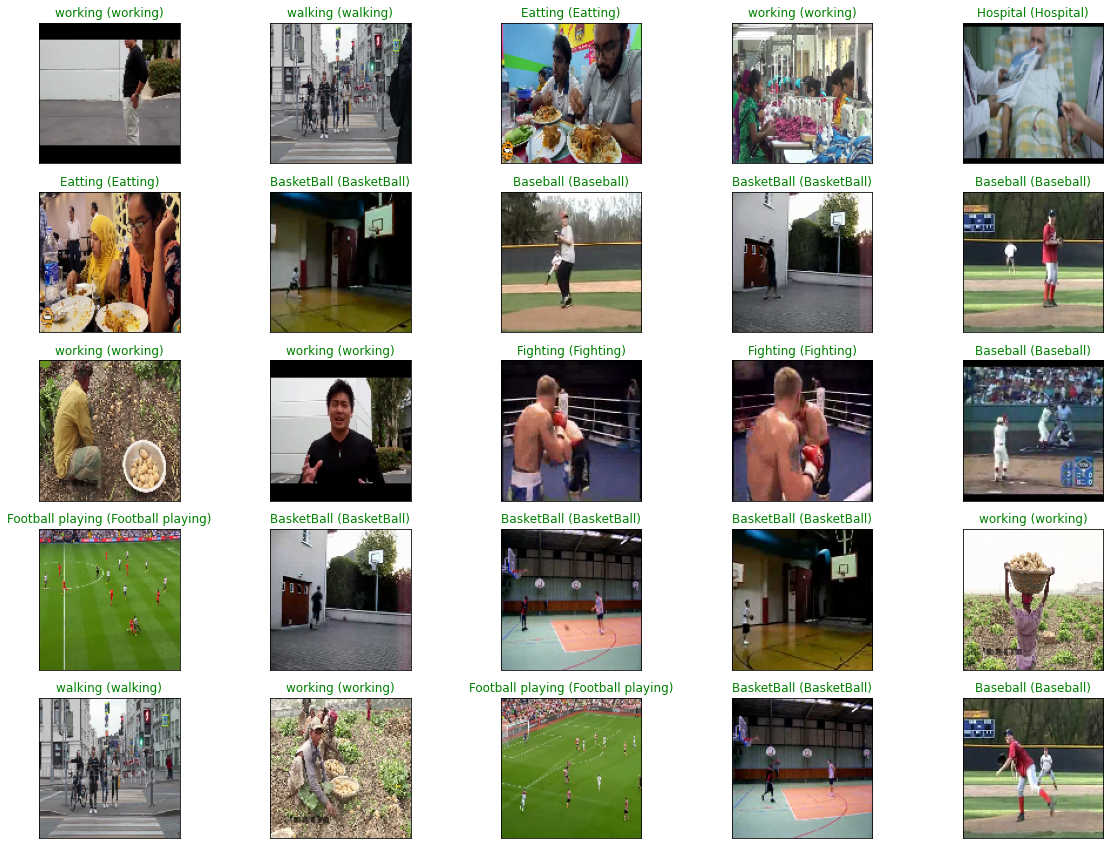

In [ ]:
# using model to predict on test data
y_pred = model.predict(X_test)

# Lets plot the predictions of different human activity and check their original labels

fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[2], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(output[pred_idx], output[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
history_dict = CNN_model.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'recall', 'precision', 'auc', 'true_positives', 'true_negatives', 'false_negatives', 'false_positives', 'val_loss', 'val_acc', 'val_recall', 'val_precision', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_negatives', 'val_false_positives'])


In [ ]:
acc = CNN_model.history['acc']
val_acc = CNN_model.history['val_acc']

loss = CNN_model.history['loss']
val_loss = CNN_model.history['val_loss']

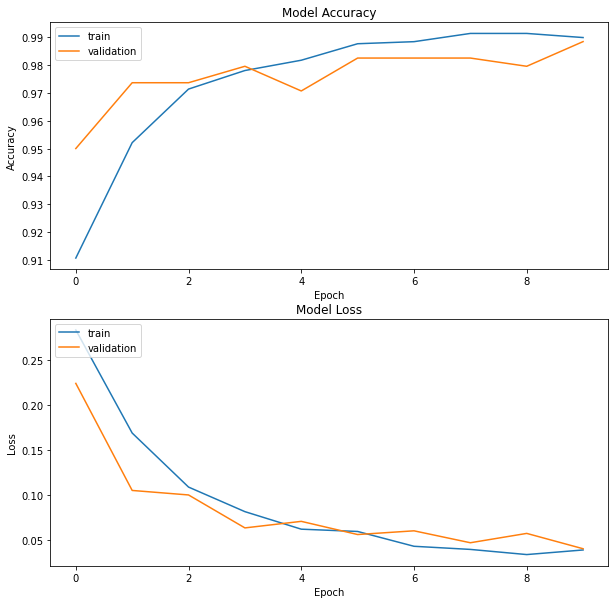

In [ ]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(CNN_model.history['acc'])  
plt.plot(CNN_model.history['val_acc'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(CNN_model.history['loss'])  
plt.plot(CNN_model.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
import seaborn as sns

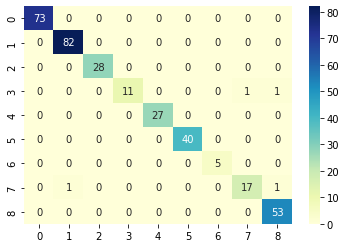

In [ ]:
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred,axis=-1)
t_true=np.argmax(y_test,axis=-1)
b=confusion_matrix(t_true, y_pred,labels=output_lebel)
sns.heatmap(b,annot=True,cmap="YlGnBu")

In [ ]:
pd.DataFrame.from_dict(CNN_model.history).to_csv('/content/drive/MyDrive/Activity/CNN_history.csv',index=False)

In [ ]:
a=pd.DataFrame.from_dict(CNN_model.history)
a.head()

,loss,acc,recall,precision,auc,true_positives,true_negatives,false_negatives,false_positives,val_loss,val_acc,val_recall,val_precision,val_auc,val_true_positives,val_true_negatives,val_false_negatives,val_false_positives
0,0.283817,0.910833,0.894620,0.933128,0.993183,1214.0,10769.0,143.0,87.0,0.224395,0.950000,0.935294,0.963636,0.996204,318.0,2708.0,22.0,12.0
1,0.169198,0.952100,0.927045,0.969183,0.998773,1258.0,10816.0,99.0,40.0,0.105374,0.973529,0.964706,0.973294,0.999357,328.0,2711.0,12.0,9.0
2,0.109118,0.971260,0.961680,0.978995,0.999344,1305.0,10828.0,52.0,28.0,0.100364,0.973529,0.967647,0.976261,0.999403,329.0,2712.0,11.0,8.0
3,0.081808,0.977892,0.970523,0.985041,0.999618,1317.0,10836.0,40.0,20.0,0.063737,0.979412,0.979412,0.982301,0.999746,333.0,2714.0,7.0,6.0
4,0.062322,0.981577,0.977892,0.990299,0.999801,1327.0,10843.0,30.0,13.0,0.071011,0.970588,0.970588,0.976331,0.999708,330.0,2712.0,10.0,8.0


**Improved CNN**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_width, img_height = 120, 120
base_model=ResNet50(weights='imagenet',include_top=False, input_shape=(img_width, img_height, 3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  175


In [ ]:
from tensorflow import keras
import tensorflow as tf

In [ ]:
fine_tune_at = 85
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False




In [ ]:
#adding some layers to the resnet 50_model imported and again fitting the model to check the performance

transfer_learning_model = Sequential()
 
transfer_learning_model.add(base_model)




transfer_learning_model.add(tf.keras.layers.GlobalAveragePooling2D())
transfer_learning_model.add(Dense(256))
transfer_learning_model.add(Activation('relu'))
transfer_learning_model.add(Dropout(0.4))
transfer_learning_model.add(Dense(9,activation = 'softmax'))
transfer_learning_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 9)                 2313      
                                                      

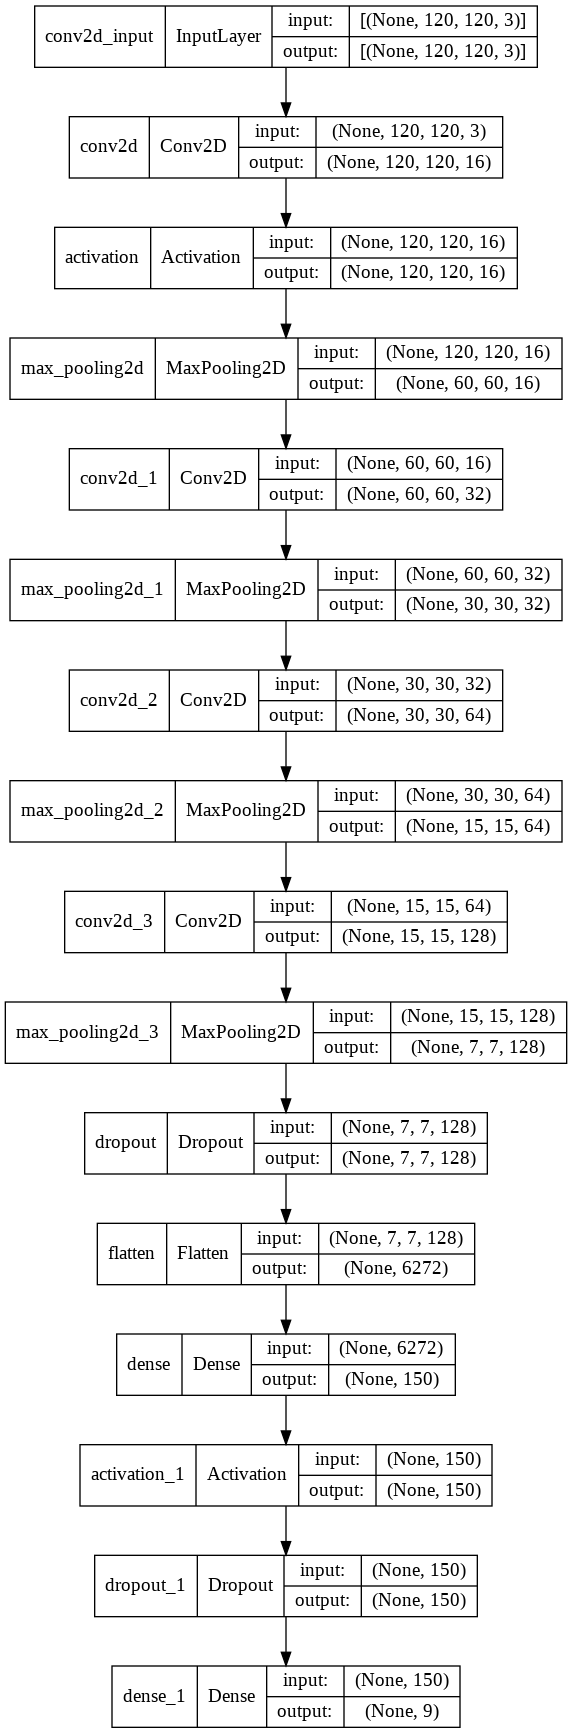

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file="base_model.png", show_shapes=True, show_layer_names=True)

In [ ]:
import keras.optimizers
from tensorflow.keras.optimizers import Adam

optimizer = Adam()
transfer_learning_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy',keras.metrics.Recall(), keras.metrics.Precision()])
#fitting the new model


checkpointer = ModelCheckpoint(filepath = 'transfer_learning.hdf5', verbose = 1, save_best_only = True)

# running 
transfer_learning_cnn = transfer_learning_model.fit(X_train,y_train,
        batch_size = 128,
        epochs=10,
        validation_data=(X_test, y_test),
        callbacks = [checkpointer],
        verbose=1)

Epoch 1/2000
11/11 [==============================] - ETA: 0s - loss: 0.8079 - accuracy: 0.8055 - recall_2: 0.7178 - precision_2: 0.8566
Epoch 00001: val_loss improved from inf to 1869.35876, saving model to transfer_learning.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Streaming output truncated to the last 5000 lines.
11/11 [==============================] - 6s 535ms/step - loss: 5.6062e-06 - accuracy: 1.0000 - recall_2: 1.0000 - precision_2: 1.0000 - val_loss: 0.0855 - val_accuracy: 0.9824 - val_recall_2: 0.9824 - val_precision_2: 0.9824
Epoch 670/2000
11/11 [==============================] - ETA: 0s - loss: 1.2096e-05 - accuracy: 1.0000 - recall_2: 1.0000 - precision_2: 1.0000
Epoch 00670: val_loss did not improve from 0.03950
11/11 [==============================] - 6s 533ms/step - loss: 1.2096e-05 - accuracy: 1.0000 - recall_2: 1.0000 - precision_2: 1.0000 - val_loss: 0.0834 - val_accuracy: 0.9824 - val_recall_2: 0.9824 - val_precision_2: 0.9824
Epoch 671/2000
11/11 [==============================] - ETA: 0s - loss: 3.5999e-06 - accuracy: 1.0000 - recall_2: 1.0000 - precision_2: 1.0000
Epoch 00671: val_loss did not improve from 0.03950
11/11 [==============================] - 6s 533ms/step - loss: 3.5999e-06 - accuracy: 1.0000 - recall_2: 1.0000

In [ ]:
#score of the new model built using transfer learning

score = transfer_learning_model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

NameError: ignored

In [ ]:
#plotting curves for the transfer learning model

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(transfer_learning_cnn.history['accuracy'])  
plt.plot(transfer_learning_cnn.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(transfer_learning_cnn.history['loss'])  
plt.plot(transfer_learning_cnn.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [ ]:
y_pred = transfer_learning_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=-1)
t_true=np.argmax(y_test,axis=-1)
Improved=confusion_matrix(t_true, y_pred,labels=output_lebel)
sns.heatmap(Improved,annot=True,cmap="YlGnBu")

In [ ]:
print(Improved)

In [ ]:
t_true

 **RESNET 50**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
img_width, img_height = 120, 120
base_model1=ResNet50(weights=None,include_top=False, input_shape=(img_width, img_height, 3))


In [ ]:
base_model1.trainable = True

print("Number of layers in the base model: ", len(base_model1.layers))

Number of layers in the base model:  175


In [ ]:
from tensorflow import keras
import tensorflow as tf

In [ ]:
fine_tune_at = 85
for layer in base_model1.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
from keras.models import Sequential

In [ ]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import pandas as pd

In [ ]:
#adding some layers to the resnet 50_model imported and again fitting the model to check the performance

transfer_learning_model = Sequential()
 
transfer_learning_model.add(base_model1)




transfer_learning_model.add(tf.keras.layers.GlobalAveragePooling2D())
transfer_learning_model.add(Dense(128))
transfer_learning_model.add(Activation('relu'))
transfer_learning_model.add(Dropout(0.4))
transfer_learning_model.add(Dense(9,activation = 'softmax'))
transfer_learning_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 9)                 1161      
                                                      

In [ ]:
img_shape = (120, 120, 3)
train_dir="Images"
 
Name = "Model0"
df = []
lebel = []
rel_dirname = '/content/drive/MyDrive/Activity/Images'
    
for dirname in os.listdir(rel_dirname):
        print(dirname)
        for filename in glob(rel_dirname+'/'+dirname+'/*.png'):
             #print(filename)
             img = image.load_img((filename),target_size=img_shape)
             img = image.img_to_array(img)
             img = img/255.0
             df.append(img)
             lebel.append(dirname)
X = np.array(df)
lebel = np.array(lebel)
y = to_categorical(lebel)
print(X.shape)
print(y.shape)

0
1
2
3
4
5
6
7
8
(1697, 120, 120, 3)
(1697, 9)


In [ ]:
# splitting train set into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(y_train.shape)


(1357, 120, 120, 3)
(1357, 9)


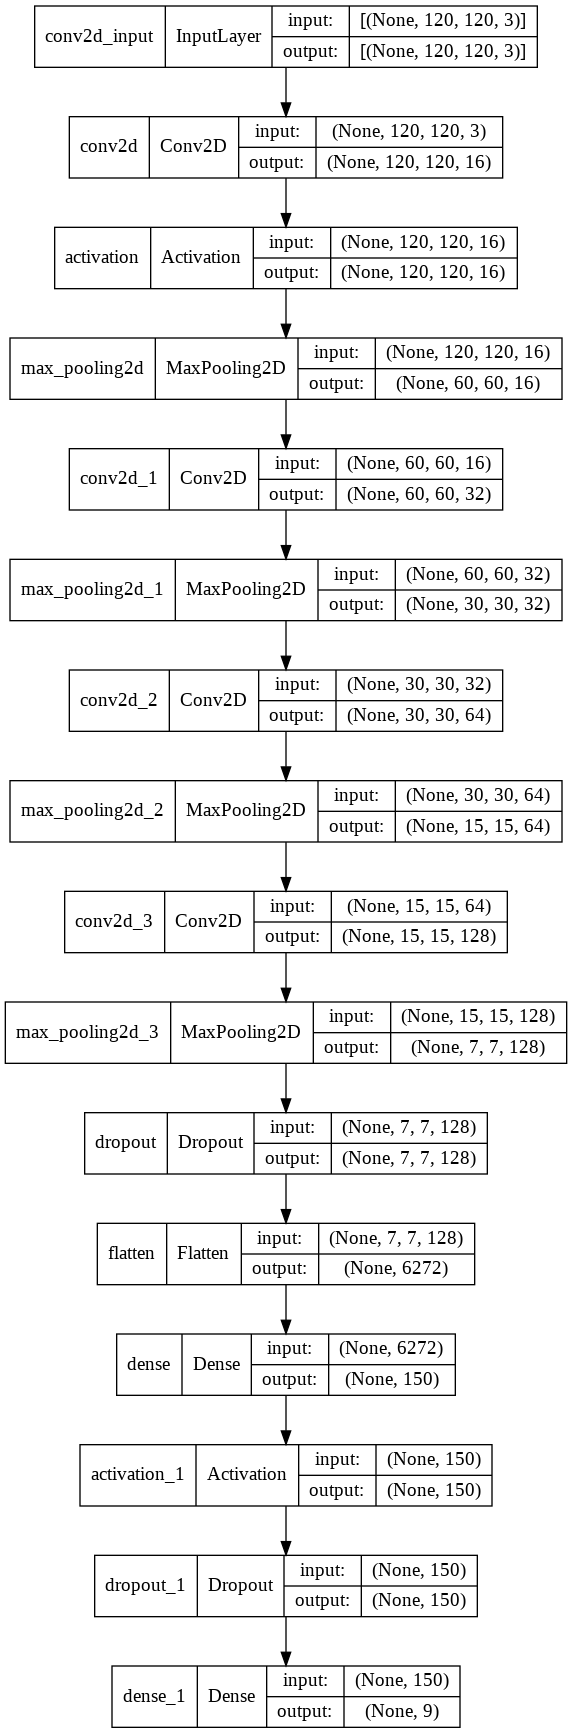

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file="base_model1.png", show_shapes=True, show_layer_names=True)

In [ ]:
import keras.optimizers
from tensorflow.keras.optimizers import Adam

optimizer = Adam()
transfer_learning_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy',keras.metrics.Recall(), keras.metrics.Precision()])
#fitting the new model


checkpointer = ModelCheckpoint(filepath = 'transfer_learning.hdf5', verbose = 1, save_best_only = True)

# running 
transfer_learning_cnn = transfer_learning_model.fit(X_train,y_train,
        batch_size = 128,
        epochs=500,
        validation_data=(X_test, y_test),
        callbacks = [checkpointer],
        verbose=1)

Epoch 1/500
11/11 [==============================] - ETA: 0s - loss: 0.0346 - accuracy: 0.9897 - recall_1: 0.9889 - precision_1: 0.9911
Epoch 00001: val_loss improved from inf to 21.23016, saving model to transfer_learning.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


11/11 [==============================] - 9s 474ms/step - loss: 0.0346 - accuracy: 0.9897 - recall_1: 0.9889 - precision_1: 0.9911 - val_loss: 21.2302 - val_accuracy: 0.5265 - val_recall_1: 0.5265 - val_precision_1: 0.5265
Epoch 2/500
11/11 [==============================] - ETA: 0s - loss: 0.0822 - accuracy: 0.9779 - recall_1: 0.9772 - precision_1: 0.9815
Epoch 00002: val_loss did not improve from 21.23016
11/11 [==============================] - 3s 249ms/step - loss: 0.0822 - accuracy: 0.9779 - recall_1: 0.9772 - precision_1: 0.9815 - val_loss: 28.5586 - val_accuracy: 0.4765 - val_recall_1: 0.4765 - val_precision_1: 0.4779
Epoch 3/500
11/11 [==============================] - ETA: 0s - loss: 0.1260 - accuracy: 0.9772 - recall_1: 0.9742 - precision_1: 0.9778
Epoch 00003: val_loss did not improve from 21.23016
11/11 [==============================] - 3s 251ms/step - loss: 0.1260 - accuracy: 0.9772 - recall_1: 0.9742 - precision_1: 0.9778 - val_loss: 34.4867 - val_accuracy: 0.5088 - val_r

In [ ]:
#score of the new model built using transfer learning

score = transfer_learning_model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

11/11 [==============================] - 0s 40ms/step - loss: 0.0905 - accuracy: 0.9882 - recall_1: 0.9882 - precision_1: 0.9882
Test accuracy: 0.9882352948188782


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

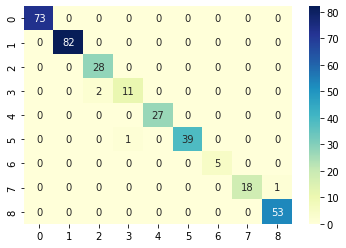

In [ ]:
y_pred = transfer_learning_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=-1)
t_true=np.argmax(y_test,axis=-1)
d=confusion_matrix(t_true, y_pred,labels=output_lebel)
sns.heatmap(d,annot=True,cmap="YlGnBu")

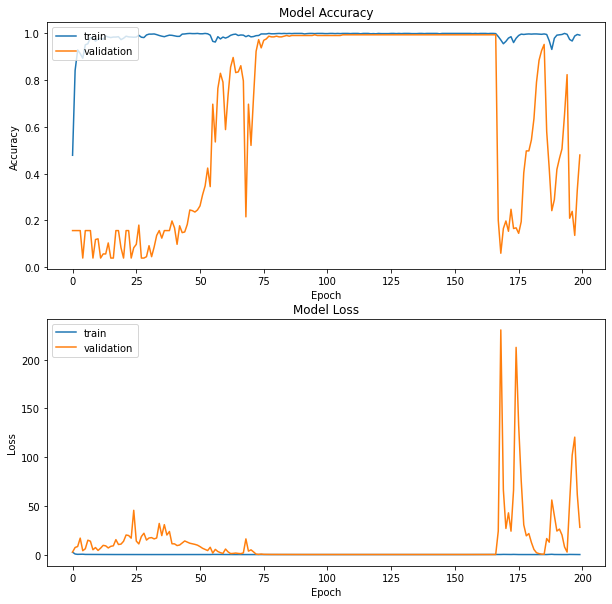

In [ ]:
#plotting curves for the transfer learning model

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(transfer_learning_cnn.history['accuracy'])  
plt.plot(transfer_learning_cnn.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(transfer_learning_cnn.history['loss'])  
plt.plot(transfer_learning_cnn.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()